In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



df = pd.read_csv('/content/xAPI-Edu-Data.csv')



In [ ]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [ ]:
df.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/xAPI-Edu-Data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'xAPI-Edu-Data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 480 rows and 17 columns


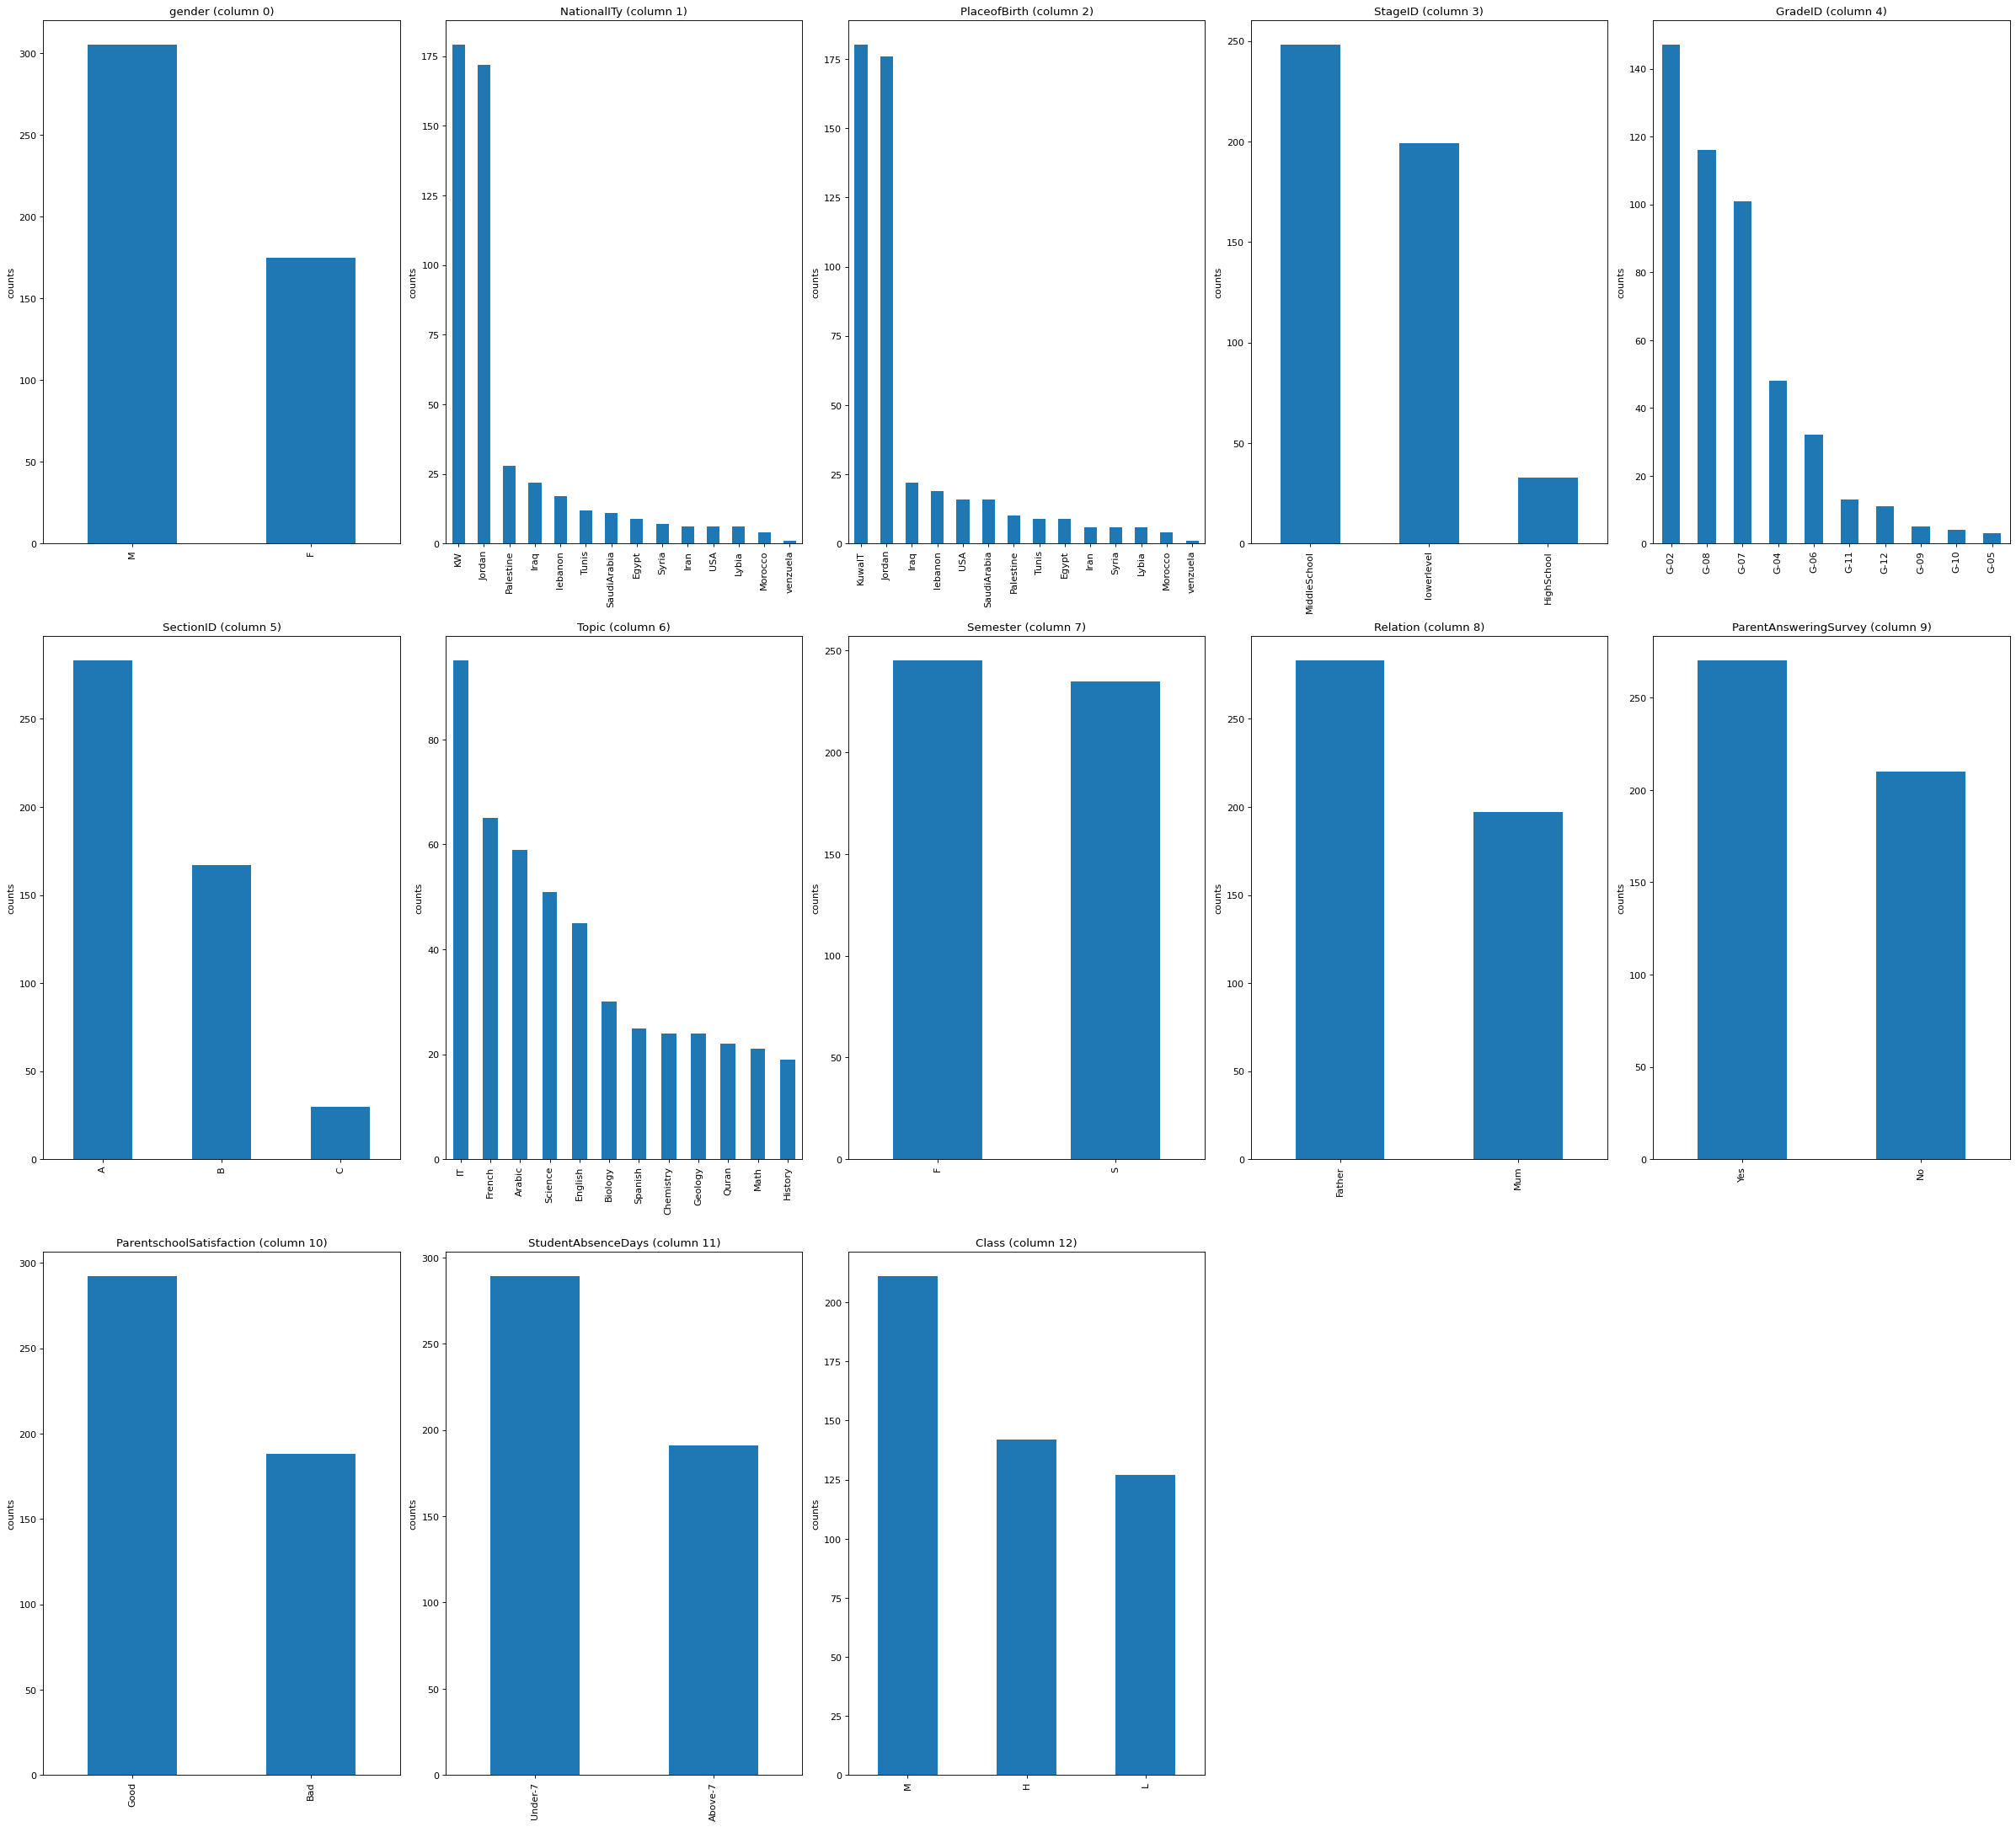

In [ ]:
plotPerColumnDistribution(df1, 16, 5)

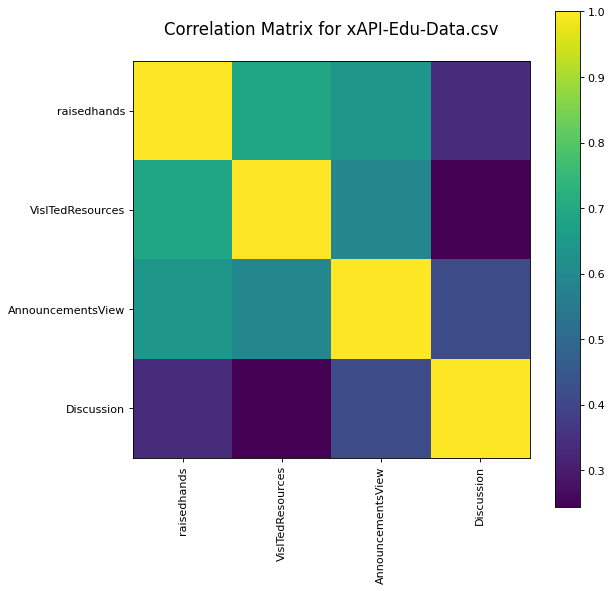

In [ ]:
plotCorrelationMatrix(df1, 8)

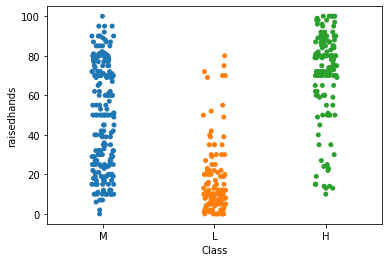

In [ ]:
sns.stripplot(x="Class", y="raisedhands", data=df, jitter=True);

In [ ]:
print(df['SectionID'].value_counts())
print(df['PlaceofBirth'].value_counts())


A    283
B    167
C     30
Name: SectionID, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64


## Data Preparation ##



In [ ]:
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [ ]:
df1 = pd.get_dummies(df['gender'])
df2 = pd.get_dummies(df['NationalITy'])
df3 = pd.get_dummies(df['PlaceofBirth'])
df4 = pd.get_dummies(df['StageID'])
df5 = pd.get_dummies(df['GradeID'])
df6 = pd.get_dummies(df['Topic'])
df7 = pd.get_dummies(df['Semester'])
df8 = pd.get_dummies(df['Relation'])
df9 = pd.get_dummies(df['ParentAnsweringSurvey'])
df10 = pd.get_dummies(df['ParentschoolSatisfaction'])
df11 = pd.get_dummies(df['StudentAbsenceDays'])
df12 = pd.get_dummies(df['Class'])

df = pd.concat([df, df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=1)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,F,M,Egypt,Iran,Iraq,Jordan,KW,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela,Egypt,Iran,Iraq,Jordan,KuwaIT,Lybia,Morocco,...,lebanon,venzuela,HighSchool,MiddleSchool,lowerlevel,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,F,S,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7,H,L,M
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


## Cluster Plotting Time ##



In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
# Get only the numeric columns from games.
numericalColumns = df._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(numericalColumns)
# Get the cluster assignments.
labels = kmeans_model.labels_



## Principle Component Analysis ##


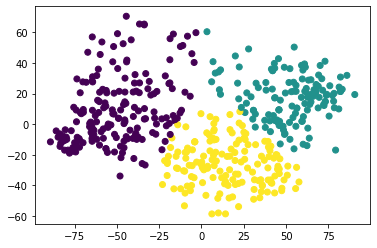

In [ ]:
# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(numericalColumns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

## Naive byes classification ##

 I first have to make the prediction variable Class, which is a classification variable, into a numerical variable. I'll call this new variable Grade.

In [ ]:
def map_values(row, values_dict):
    return values_dict[row]

values_dict = {'L': 1, 'M': 2, 'H': 3}

df['Grade'] = df['Class'].apply(map_values, args = (values_dict,))

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,F,M,Egypt,Iran,Iraq,Jordan,KW,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela,Egypt,Iran,Iraq,Jordan,KuwaIT,Lybia,Morocco,...,venzuela,HighSchool,MiddleSchool,lowerlevel,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,F,S,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7,H,L,M,Grade
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,2


In [ ]:
train = df.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(384, 86)
(96, 86)


In [ ]:
unwantedCols = ["gender", "NationalITy", 'Grade', "PlaceofBirth", "StageID", "GradeID", "SectionID", "Topic", "Semester", "Relation", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "StudentAbsenceDays", "Class", "Grade"]
columns = df.columns.tolist()
columns = [c for c in columns if c not in unwantedCols]
target = "Grade"


In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,F,M,Egypt,Iran,Iraq,Jordan,KW,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela,Egypt,Iran,Iraq,Jordan,KuwaIT,Lybia,Morocco,...,venzuela,HighSchool,MiddleSchool,lowerlevel,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,F,S,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7,H,L,M,Grade
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,2


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(train[columns], train[target])

#Predict the response for test dataset
y_pred = gnb.predict(test[columns])
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, test[target]))

Accuracy: 0.9895833333333334


## Random Forest classification ##


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train[columns], train[target])

y_pred=clf.predict(test[columns])

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, test[target]))

Accuracy: 1.0


## SVM classification ##


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train[columns], train[target])

#Predict the response for test dataset
y_pred = clf.predict(test[columns])

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, test[target]))

Accuracy: 1.0
